# Práctico 1: Recomendación de Artistas

Mariano Zibecchi
mzibecchi@gmail.com

En este práctico trabajaremos con el conjuto de datos de [LastFM](https://grouplens.org/datasets/hetrec-2011/) para el desarrollo de un sistema de recomendación que, dado el nombre de un artista musical, devuelve una lista de artistas "similares".

Para el práctico utilizaremos el conjunto de datos de LastFM que consiguieron del [notebook de instalación](./instalacion.ipynb). Se recomienda leer el [Readme](http://files.grouplens.org/datasets/hetrec2011/hetrec2011-lastfm-readme.txt) de los datos para saber más sobre que información contiene cada archivo.

La idea del práctico es hacer un análisis muy sencillo del conjunto de datos y desarrollar un sistema de recomendación basado en filtrado colaborativo (usando Surpr!se), a partir de los datos existentes.

In [1]:
import pandas as pd

* artists.dat
   
        This file contains information about music artists listened and tagged by the users.

In [2]:
artist_df = pd.read_csv("./data/lastfm/artists.dat", sep="\t")
artist_df.head()

,id,name,url,pictureURL
0,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg
1,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg
2,3,Carpathian Forest,http://www.last.fm/music/Carpathian+Forest,http://userserve-ak.last.fm/serve/252/40222717...
3,4,Moi dix Mois,http://www.last.fm/music/Moi+dix+Mois,http://userserve-ak.last.fm/serve/252/54697835...
4,5,Bella Morte,http://www.last.fm/music/Bella+Morte,http://userserve-ak.last.fm/serve/252/14789013...


* user_artists.dat
   
        This file contains the artists listened by each user.
        It also provides a listening count for each [user, artist] pair.

In [3]:
user_artist_plays_df = pd.read_csv("./data/lastfm/user_artists.dat", sep="\t")
user_artist_plays_df.head()

,userID,artistID,weight
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983


## Ejercicio 1 - Análisis Exploratorio de Datos

En esta primera parte deberán hacer un análisis exploratorio de los datos, aprovechando toda la información brindada por el conjunto. A partir de eso podrán tener mayor idea de qué tipo de datos estarán enfrentando (describe o hist).

Algunas preguntas para responder:
- ¿Cuáles son los artistas que fueron más escuchados?
- ¿Cómo es la distribución de cantidad de listens por user?
- ¿Es posible ver el género más escuchado?

In [4]:
artist_df.describe()

,id
count,17632.000000
mean,9156.636853
std,5392.515296
min,1.000000
25%,4501.750000
50%,9048.500000
75%,13769.250000
max,18745.000000


In [5]:
artist_df.isnull().sum()

id              0
name            0
url             0
pictureURL    444
dtype: int64

Con esto, damos por verificado que no existen null en las features de interes: id, name

In [6]:
user_artist_plays_df.describe()

,userID,artistID,weight
count,92834.000000,92834.000000,92834.00000
mean,1037.010481,3331.123145,745.24393
std,610.870436,4383.590502,3751.32208
min,2.000000,1.000000,1.00000
25%,502.000000,436.000000,107.00000
50%,1029.000000,1246.000000,260.00000
75%,1568.000000,4350.000000,614.00000
max,2100.000000,18745.000000,352698.00000


In [7]:
user_artist_plays_df.isnull().sum()

userID      0
artistID    0
weight      0
dtype: int64

In [8]:
lastfm_df = pd.merge(artist_df, user_artist_plays_df, 
                     left_on="id", right_on="artistID", )

lastfm_df.head()

,id,name,url,pictureURL,userID,artistID,weight
0,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg,34,1,212
1,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg,274,1,483
2,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg,785,1,76
3,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg,135,2,1021
4,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg,257,2,152


- ¿Cuáles son los artistas que fueron más escuchados?


In [9]:
artist_df [ artist_df['id'] == 289]

,id,name,url,pictureURL
283,289,Britney Spears,http://www.last.fm/music/Britney+Spears,http://userserve-ak.last.fm/serve/252/60126439...


In [10]:
user_artist_plays_df[ user_artist_plays_df['artistID']==289]

,userID,artistID,weight
255,7,289,11112
307,8,289,2258
456,11,289,3851
756,17,289,118
905,21,289,4620
...,...,...,...
91750,2075,289,206
91790,2076,289,348
91936,2079,289,1709
92243,2087,289,1356


In [11]:
lastfm_df[ lastfm_df['artistID'] == 289 ]

,id,name,url,pictureURL,userID,artistID,weight
13175,289,Britney Spears,http://www.last.fm/music/Britney+Spears,http://userserve-ak.last.fm/serve/252/60126439...,7,289,11112
13176,289,Britney Spears,http://www.last.fm/music/Britney+Spears,http://userserve-ak.last.fm/serve/252/60126439...,8,289,2258
13177,289,Britney Spears,http://www.last.fm/music/Britney+Spears,http://userserve-ak.last.fm/serve/252/60126439...,11,289,3851
13178,289,Britney Spears,http://www.last.fm/music/Britney+Spears,http://userserve-ak.last.fm/serve/252/60126439...,17,289,118
13179,289,Britney Spears,http://www.last.fm/music/Britney+Spears,http://userserve-ak.last.fm/serve/252/60126439...,21,289,4620
...,...,...,...,...,...,...,...
13692,289,Britney Spears,http://www.last.fm/music/Britney+Spears,http://userserve-ak.last.fm/serve/252/60126439...,2075,289,206
13693,289,Britney Spears,http://www.last.fm/music/Britney+Spears,http://userserve-ak.last.fm/serve/252/60126439...,2076,289,348
13694,289,Britney Spears,http://www.last.fm/music/Britney+Spears,http://userserve-ak.last.fm/serve/252/60126439...,2079,289,1709
13695,289,Britney Spears,http://www.last.fm/music/Britney+Spears,http://userserve-ak.last.fm/serve/252/60126439...,2087,289,1356


In [12]:
lastfm_df.groupby('artistID').agg({'weight':"sum"}).sort_values('weight', ascending=False)

,weight
artistID,
289,2393140
72,1301308
89,1291387
292,1058405
498,963449
...,...
17468,1
14309,1
14308,1


- ¿Cómo es la distribución de cantidad de listens por user?


In [13]:
listens_por_user = lastfm_df.groupby('userID').agg({'weight':'sum'})

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.figure(figsize=(12,8))
sns.distplot(listens_por_user,bins=10, label='Listens')
plt.legend(bbox_to_anchor=(1, 1))
sns.despine()

## Ejercicio 2 - Matriz de Usuario-Contenido

En este ejercicio, a partir del conjunto de datos, deberán generar una matriz de usuario-contenido. Tengan en cuenta que los ratings, en este caso, son implícitos, puesto que se dan a partir de la cantidad de veces que un usuario escuchó a cierto artista.

### Ranking Implicito

Consideramos que el ranking implicito debe ser relativo a la cantidad de reproducciones que un usuario realiza.

En este caso, la regla que utilizaremos para generar el ranking es la siguiente:
* consideramos el ranking de 1 a 5, siendo 1 malo, 5 excelente
* > 70% - ranking = 5 
* 50 - 70 % - ranking = 4
* 30 - 50 % - ranking = 3
* 10 - 30 % - ranking = 2
* 

In [15]:
lastfm_df.groupby(['userID','artistID']).agg({'weight':"sum"}).sort_values('weight', ascending=False)

,,weight
userID,artistID,
1642,72,352698
2071,792,324663
1094,511,320725
1905,203,257978
1664,498,227829
...,...,...
942,4617,1
1262,13546,1
1004,2422,1


In [16]:
lastfm_df.groupby(['userID','artistID']).agg( cant_repr = pd.NamedAgg(column='weight', aggfunc=max))

cant_repr
userID artistID           
2      51            13883
       52            11690
       53            11351
       54            10300
       55             8983
...                    ...
2100   18726           337
       18727           297
       18728           281
       18729           280
       18730           263

[92834 rows x 1 columns]

In [17]:
lastfm_df.groupby(['userID']).agg( cant_repr = pd.NamedAgg(column='weight', aggfunc=sum),
                                             max_repr = pd.NamedAgg(column='weight', aggfunc=max))

,cant_repr,max_repr
userID,,
2,168737,13883
3,20501,13176
4,26930,4983
5,13159,884
6,1011,41
...,...,...
2095,4885,548
2096,62714,14690
2097,13830,2628


In [18]:
max_listens_user = lastfm_df.groupby('userID')['weight'].max()
max_listens_user

userID
2       13883
3       13176
4        4983
5         884
6          41
        ...  
2095      548
2096    14690
2097     2628
2099      770
2100     2026
Name: weight, Length: 1892, dtype: int64

In [19]:
lastfm_df['max_listens_user'] = lastfm_df['userID'].apply(lambda x: max_listens_user[x] 
                                                          if x in max_listens_user else -1)
    

In [20]:
lastfm_df['rating'] = lastfm_df['weight'] / lastfm_df['max_listens_user']


In [21]:
lastfm_df[['userID','artistID','rating']]
          


,userID,artistID,rating
0,34,1,0.055775
1,274,1,0.065394
2,785,1,0.025149
3,135,2,0.150902
4,257,2,0.154315
...,...,...,...
92829,454,18741,0.041386
92830,454,18742,0.040423
92831,454,18743,0.039461
92832,454,18744,0.039324


In [22]:
lastfm_df.groupby(['userID','artistID']).agg( max_repr = pd.NamedAgg(column='weight', aggfunc=max),
                                            weight = pd.NamedAgg(column='weight', aggfunc=sum))


max_repr  weight
userID artistID                  
2      51           13883   13883
       52           11690   11690
       53           11351   11351
       54           10300   10300
       55            8983    8983
...                   ...     ...
2100   18726          337     337
       18727          297     297
       18728          281     281
       18729          280     280
       18730          263     263

[92834 rows x 2 columns]

Parece que funciona... ya tenemos el rating para cada usuario, artista

In [23]:
mean_ratings = lastfm_df.groupby('artistID')[['rating']].mean()

lowest_rated = mean_ratings['rating'].idxmin()

lastfm_df[ lastfm_df['artistID'] == lowest_rated]


,id,name,url,pictureURL,userID,artistID,weight,max_listens_user,rating
82629,9851,Sunidhi Chauhan,http://www.last.fm/music/Sunidhi+Chauhan,http://userserve-ak.last.fm/serve/252/31750125...,757,9851,4,169596,0.000024


In [24]:
max_rated = mean_ratings['rating'].idxmax()

lastfm_df[ lastfm_df['artistID'] == max_rated]


,id,name,url,pictureURL,userID,artistID,weight,max_listens_user,rating
31451,634,Μιχάλης Χατζηγιάννης,http://www.last.fm/music/%CE%9C%CE%B9%CF%87%CE...,http://userserve-ak.last.fm/serve/252/57705717...,16,634,889,889,1.0


Tanto el peor rankeado como el mejor, tienen solo un rating...

Veamos la distribucion de los ratings

In [25]:
lastfm_df.rating.describe()

count    92834.000000
mean         0.182368
std          0.208768
min          0.000008
25%          0.042909
50%          0.111294
75%          0.237012
max          1.000000
Name: rating, dtype: float64

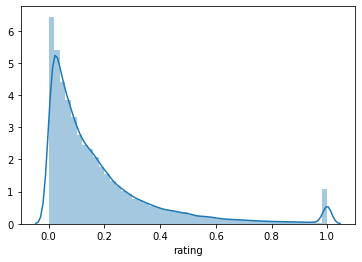

In [26]:

import pandas as pd
ax = sns.distplot(lastfm_df['rating'])


Veamos la cantidad de ratings por artista

In [27]:
lastfm_df.groupby('artistID')['rating'].count().reset_index().sort_values('rating', ascending=False)[:10]

,artistID,rating
83,89,611
283,289,522
282,288,484
221,227,480
294,300,473
61,67,429
327,333,417
286,292,407
184,190,400
492,498,399


Veamos quienes son los artistas que mas ratings han recibido

In [28]:
artist_df[ artist_df['id']==89 ]['name']

83    Lady Gaga
Name: name, dtype: object

In [29]:
artist_df[ artist_df['id']==289 ]['name']

283    Britney Spears
Name: name, dtype: object

Artista mejor rankeado

In [30]:
highest_rated = lastfm_df['rating'].idxmax()
artist_df[ artist_df['id'] == lastfm_df.iloc[ lastfm_df['rating'].idxmax() ].artistID ]

,id,name,url,pictureURL
1,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg


## Ejercicio 3 - Entrenamiento del algoritmo de recomendación

Utilizando las herramientas brindadas por Surpr!se, entrenen varios modelos de sistemas de recomendación basados en filtrado colaborativo a partir de su matriz de usuario-contenido. Recuerden tener en cuenta lo aprendido en la diplomatura a la hora de evaluar y validar el modelo.

Si necesitan inspiración, les recomiendo revisar [este notebook con información de como entrenar un sistema de recomendación con Surpr!se](https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Building%20Recommender%20System%20with%20Surprise.ipynb).

In [31]:
lastfm_muc_df = pd.DataFrame()

lastfm_muc_df ['userID'] = lastfm_df['userID']
lastfm_muc_df ['artistID'] = lastfm_df['artistID']
lastfm_muc_df ['rating'] = lastfm_df['rating']

lastfm_muc_df.head()


,userID,artistID,rating
0,34,1,0.055775
1,274,1,0.065394
2,785,1,0.025149
3,135,2,0.150902
4,257,2,0.154315


In [32]:
from surprise import Dataset, Reader, KNNWithMeans
from surprise.accuracy import rmse
from surprise.model_selection import cross_validate, train_test_split

reader = Reader(rating_scale=(lastfm_muc_df.rating.min(), lastfm_muc_df.rating.max()))

ratings = Dataset.load_from_df( lastfm_muc_df[["userID", "artistID", "rating"]], reader)

In [33]:
ratings_train, ratings_test = train_test_split(ratings, test_size=0.2)

model = KNNWithMeans(k=5).fit(ratings_train)
predictions = model.test(ratings_test)

print("RMSE on test: {:.4f}".format(rmse(predictions, verbose=False)))

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE on test: 0.1926


### Revision de predicciones

Vamos a revisar las predicciones, tomando como ejemplo https://towardsdatascience.com/building-and-testing-recommender-systems-with-surprise-step-by-step-d4ba702ef80b

Seleccionamos las mejores y las peores predicciones

In [34]:
def get_numItemsByUser(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(model.trainset.ur[model.trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_numUsersRatedItem(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(model.trainset.ir[model.trainset.to_inner_iid(iid)])
    except ValueError:
        return 0
    


In [35]:
pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
pred_df.head()

,uid,iid,rui,est,details
0,86,2381,0.250857,0.253783,"{'actual_k': 5, 'was_impossible': False}"
1,1434,14541,0.007419,0.182750,"{'was_impossible': True, 'reason': 'User and/o..."
2,1509,1681,0.115896,0.269746,"{'actual_k': 5, 'was_impossible': False}"
3,1367,6824,0.142681,0.188591,"{'actual_k': 4, 'was_impossible': False}"
4,933,432,0.076063,0.088251,"{'actual_k': 5, 'was_impossible': False}"


Parameters:	
uid – The (raw) user id.  
iid – The (raw) item id.  
r_ui (float) – The true rating 𝑟𝑢𝑖.  
est (float) – The estimated rating 𝑟̂ 𝑢𝑖.  
details (dict) – Stores additional details about the prediction that might be useful for later analysis.
  
    
Agregamos al dataset dos features: 
cantidad de items rankeadas por el usurio uid  
cantidad de usuarios que rankearon el item iid

In [36]:
pred_df['numItemsByUser'] = pred_df.uid.apply(get_numItemsByUser)
pred_df['numUsersRatedItem'] = pred_df.iid.apply(get_numUsersRatedItem)
pred_df['err'] = abs( pred_df.est - pred_df.rui)

best_predictions = pred_df.sort_values(by='err')[:10]
worst_predictions = pred_df.sort_values(by='err')[-10:]

In [37]:
best_predictions

,uid,iid,rui,est,details,numItemsByUser,numUsersRatedItem,err
10204,1773,89,1.000000,1.000000,"{'actual_k': 5, 'was_impossible': False}",9,485,0.000000
122,291,975,0.000013,0.000008,"{'actual_k': 3, 'was_impossible': False}",38,13,0.000005
8047,1039,1145,0.110286,0.110280,"{'actual_k': 5, 'was_impossible': False}",42,35,0.000006
12763,2081,1875,0.133190,0.133165,"{'actual_k': 3, 'was_impossible': False}",43,4,0.000024
11994,1263,4709,0.045505,0.045478,"{'actual_k': 5, 'was_impossible': False}",35,7,0.000028
16304,1810,2047,0.000036,0.000008,"{'actual_k': 5, 'was_impossible': False}",20,9,0.000029
8564,2052,8802,0.044612,0.044575,"{'actual_k': 3, 'was_impossible': False}",42,4,0.000037
167,1173,2535,0.083960,0.083901,"{'actual_k': 5, 'was_impossible': False}",42,23,0.000059
16782,2080,1072,0.007780,0.007716,"{'actual_k': 5, 'was_impossible': False}",41,30,0.000064
5073,1037,735,0.357143,0.357208,"{'actual_k': 5, 'was_impossible': False}",42,113,0.000065


In [38]:
worst_predictions

,uid,iid,rui,est,details,numItemsByUser,numUsersRatedItem,err
13243,1791,257,1.0,0.000008,"{'actual_k': 5, 'was_impossible': False}",38,191,0.999992
10810,2069,486,1.0,0.000008,"{'actual_k': 5, 'was_impossible': False}",36,171,0.999992
16653,68,295,1.0,0.000008,"{'actual_k': 5, 'was_impossible': False}",38,300,0.999992
17860,1734,295,1.0,0.000008,"{'actual_k': 5, 'was_impossible': False}",38,300,0.999992
15070,846,234,1.0,0.000008,"{'actual_k': 5, 'was_impossible': False}",31,204,0.999992
5770,816,89,1.0,0.000008,"{'actual_k': 5, 'was_impossible': False}",35,485,0.999992
14696,840,614,1.0,0.000008,"{'actual_k': 5, 'was_impossible': False}",38,105,0.999992
18473,1001,291,1.0,0.000008,"{'actual_k': 5, 'was_impossible': False}",35,202,0.999992
9701,2004,190,1.0,0.000008,"{'actual_k': 5, 'was_impossible': False}",37,316,0.999992
16514,57,1670,1.0,0.000008,"{'actual_k': 5, 'was_impossible': False}",41,7,0.999992


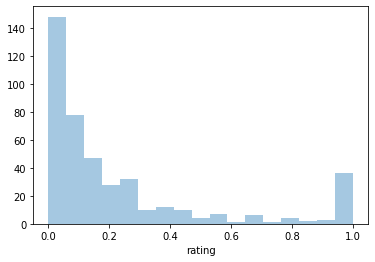

In [39]:
df = lastfm_df [ lastfm_df['artistID']==67 ]
ax = sns.distplot( df['rating'], kde=False)


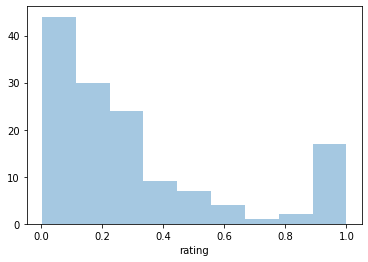

In [40]:
df = lastfm_df [ lastfm_df['artistID']==233 ]
ax = sns.distplot( df['rating'], kde=False)


En ambos casos, nuestra prediccion fue muy mala.  
Por ejemplo, ara el artista 67, nuestra prediccion para el usuario 2058 fue de rating=0,000008 con un rating real de 1.
La mayoria de los ratings para este usuario fueron bajos (0).
Probablemente nuestra estimacion vino por ese lado.

## Ejercicio 4 - Sistema de recomendación

A partir del mejor modelo de recomendación que hayan sugerido en el caso anterior, y utilizando los datos del archivo `artist.dat`, armar un sistema de recomendación sencillo que, dado un nombre de un artista, devuelva el top 10 de artistas más similares.

La idea es que el sistema tome el nombre de un artista y devuelva el nombre de otros artistas (no simplemente tomar y devolver IDs). Se recomienda [revisar este notebook para inspiración (ver el paso número 5)](https://github.com/topspinj/pydata-workshop/blob/master/tutorial.ipynb).

### Entrenamos el modelo nuevamente, esta vez item-based

Vamos a utilizar este ejemplo como inspiracion:  
https://surprise.readthedocs.io/en/stable/FAQ.html#how-to-get-the-k-nearest-neighbors-of-a-user-or-item  
  
Utilizamos el metodo get_neighbors de la clase algorithm, para que nos retorne los items mas parecidos al solicitado.  

In [67]:
reader = Reader(rating_scale=(lastfm_muc_df.rating.min(), lastfm_muc_df.rating.max()))

data = Dataset.load_from_df( lastfm_muc_df[["userID", "artistID", "rating"]], reader)

trainset = data.build_full_trainset()

# To use item-based cosine similarity
sim_options = {
    "name": "cosine",
    "user_based": False,  # Compute  similarities between items
}

model = KNNWithMeans(sim_options=sim_options)

model.fit( trainset )


Computing the cosine similarity matrix...
Done computing similarity matrix.


In [68]:
def find_similar_artists( model, k_artists, artist_id ):
    
    artist_neighbors = model.get_neighbors( artist_id, k=k_artists )
    
    artist_neighbors = (model.trainset.to_raw_iid(inner_id)
                       for inner_id in artist_neighbors)
    
    for artist_id in artist_neighbors:
        print( artist_df [artist_df['id'] == artist_id]['name'] )

In [69]:
artist_df[ artist_df['id']==89 ]['name']

83    Lady Gaga
Name: name, dtype: object

In [70]:
artist_df[ artist_df['id']== 289 ]['name']

283    Britney Spears
Name: name, dtype: object

In [71]:
find_similar_artists( model, 10, 89 )

56    Prefab Sprout
Name: name, dtype: object
60    Faithless
Name: name, dtype: object
75    Portishead
Name: name, dtype: object
76    Marc Almond
Name: name, dtype: object
77    Cock Robin
Name: name, dtype: object
88    Ministry of Sound
Name: name, dtype: object
147    De/Vision
Name: name, dtype: object
157    Pink Floyd
Name: name, dtype: object
264    Maria Bethânia
Name: name, dtype: object
292    Lily Allen
Name: name, dtype: object


In [72]:
# 289 Britney Spears
find_similar_artists( model, 10, 289 )

46    Morcheeba
Name: name, dtype: object
339    Nadja Benaissa
Name: name, dtype: object
345    Gabrielle
Name: name, dtype: object
357    Lucylicious
Name: name, dtype: object
400    HYDE
Name: name, dtype: object
508    Ill Niño
Name: name, dtype: object
557    Small Faces
Name: name, dtype: object
682    Honor Society
Name: name, dtype: object
728    Bruce Springsteen
Name: name, dtype: object
733    Lulu Santos
Name: name, dtype: object


In [73]:
artist_df[ artist_df['name'].str.contains("Queen")]


,id,name,url,pictureURL
220,226,Queens of the Stone Age,http://www.last.fm/music/Queens+of+the+Stone+Age,http://userserve-ak.last.fm/serve/252/270457.jpg
332,338,Queensberry,http://www.last.fm/music/Queensberry,http://userserve-ak.last.fm/serve/252/49220935...
823,832,I Killed the Prom Queen,http://www.last.fm/music/I+Killed+the+Prom+Queen,http://userserve-ak.last.fm/serve/252/60008937...
950,959,Queen,http://www.last.fm/music/Queen,http://userserve-ak.last.fm/serve/252/45625545...
1098,1107,"The Good, the Bad & the Queen",http://www.last.fm/music/The%2BGood%252C%2Bthe...,http://userserve-ak.last.fm/serve/252/181190.jpg
1334,1343,Queensrÿche,http://www.last.fm/music/Queensr%C3%BFche,http://userserve-ak.last.fm/serve/252/337253.jpg
1439,1448,Ivy Queen,http://www.last.fm/music/Ivy+Queen,http://userserve-ak.last.fm/serve/252/48940445...
2201,2216,Fall to the Queen,http://www.last.fm/music/Fall+to+the+Queen,http://userserve-ak.last.fm/serve/252/50560835...
2937,2957,Queen of the damned ost,http://www.last.fm/music/Queen+of+the+damned+ost,http://userserve-ak.last.fm/serve/252/13530895...
4910,5020,Queen + Paul Rodgers,http://www.last.fm/music/Queen%2B%252B%2BPaul%...,http://userserve-ak.last.fm/serve/252/11429289...


In [74]:
# 959 Queen
find_similar_artists( model, 10, 959 )

1    Diary of Dreams
Name: name, dtype: object
12    Hocico
Name: name, dtype: object
145    Deep Forest
Name: name, dtype: object
170    Scorpions
Name: name, dtype: object
219    Interpol
Name: name, dtype: object
308    Ciara
Name: name, dtype: object
314    Fergie
Name: name, dtype: object
438    múm
Name: name, dtype: object
498    HIM
Name: name, dtype: object
754    Mono
Name: name, dtype: object


In [75]:
# 226 Queen of the stone age
find_similar_artists( model, 5, 226 )

167    Placebo
Name: name, dtype: object
176    Keane
Name: name, dtype: object
198    Damien Rice
Name: name, dtype: object
200    Beck
Name: name, dtype: object
202    Babyshambles
Name: name, dtype: object


In [76]:
artist_df[ artist_df['name'].str.contains("Clapton")]


,id,name,url,pictureURL
722,728,Eric Clapton,http://www.last.fm/music/Eric+Clapton,http://userserve-ak.last.fm/serve/252/2366379.jpg
8598,8808,B.B. King & Eric Clapton,http://www.last.fm/music/B.B.%2BKing%2B%2526%2...,http://userserve-ak.last.fm/serve/252/34818861...


In [77]:
# 728 Eric Clapton
find_similar_artists( model, 10, 728 )

6    Marilyn Manson
Name: name, dtype: object
27    And One
Name: name, dtype: object
63    Sade
Name: name, dtype: object
160    The Cranberries
Name: name, dtype: object
168    Infected Mushroom
Name: name, dtype: object
289    Beyoncé
Name: name, dtype: object
448    Jónsi
Name: name, dtype: object
479    Kelis
Name: name, dtype: object
538    Adam Lambert
Name: name, dtype: object
731    Trans-Siberian Orchestra
Name: name, dtype: object


In [78]:
artist_df[ artist_df['id']==300 ]['name']

294    Katy Perry
Name: name, dtype: object

In [79]:
# 294 Katy Perry
find_similar_artists( model, 10, 294 )

474    Guf
Name: name, dtype: object
599    Beastie Boys
Name: name, dtype: object
649    Jessy Matador
Name: name, dtype: object
718    Ozzy Osbourne
Name: name, dtype: object
749    Психея
Name: name, dtype: object
790    Junior Caldera feat Sophie Ellis Bextor
Name: name, dtype: object
830    All Shall Perish
Name: name, dtype: object
866    Bauhaus
Name: name, dtype: object
884    Kate Miller-Heidke
Name: name, dtype: object
945    Kreator
Name: name, dtype: object
